This notebook estimates the prices of:
- European Call Option
- Arithmetic Asian Option

### Assumptions:
- Risk-neutral pricing is used.
- Interest rate, volatility, and other parameters remain constant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def simulate_gbm_paths(S0, r, sigma, T, N, M, seed=None):
    """
    Simulate M paths of GBM using Euler–Maruyama method

    Parameters:
    - S0: Initial stock price
    - r: Risk-free rate
    - sigma: Volatility
    - T: Time to maturity (in years)
    - N: Number of time steps
    - M: Number of simulations
    """
    if seed:
        np.random.seed(seed)

    dt = T / N
    S = np.zeros((M, N + 1))
    S[:, 0] = S0

    for t in range(1, N + 1):
        Z = np.random.randn(M)
        S[:, t] = S[:, t-1] * (1 + r * dt + sigma * np.sqrt(dt) * Z)  # Euler–Maruyama

    return S


In [3]:
def price_european_call(S_paths, K, r, T):
    """
    Price a European call option using Monte Carlo simulation.

    Parameters:
    - S_paths: Simulated asset paths
    - K: Strike price
    - r: Risk-free rate
    - T: Time to maturity
    """
    S_T = S_paths[:, -1]
    payoff = np.maximum(S_T - K, 0)
    price = np.exp(-r * T) * np.mean(payoff)
    return price


In [4]:
def price_arithmetic_asian_call(S_paths, K, r, T):
    """
    Price an Arithmetic Asian Call Option using Monte Carlo.

    Parameters:
    - S_paths: Simulated asset paths
    - K: Strike price
    - r: Risk-free rate
    - T: Time to maturity
    """
    S_avg = np.mean(S_paths[:, 1:], axis=1)  # exclude initial S0
    payoff = np.maximum(S_avg - K, 0)
    price = np.exp(-r * T) * np.mean(payoff)
    return price


In [5]:
# Parameters
S0 = 100       # Initial stock price
K = 100        # Strike price
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
T = 1.0        # Time to maturity (1 year)
N = 252        # Time steps
M = 10000      # Monte Carlo simulations

# Simulate GBM paths
paths = simulate_gbm_paths(S0, r, sigma, T, N, M, seed=42)

# Price options
european_call_price = price_european_call(paths, K, r, T)
asian_call_price = price_arithmetic_asian_call(paths, K, r, T)

print(f"European Call Option Price: {european_call_price:.4f}")
print(f"Arithmetic Asian Call Option Price: {asian_call_price:.4f}")


European Call Option Price: 10.3416
Arithmetic Asian Call Option Price: 5.6684


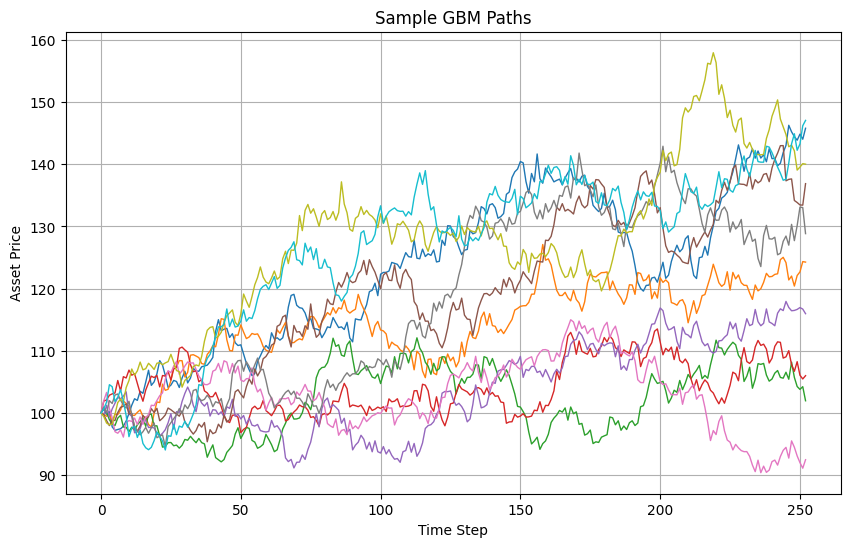

In [7]:
# Plot sample asset paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(paths[i], lw=1)
plt.title('Sample GBM Paths')
plt.xlabel('Time Step')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()
